# Redes Neurais 

Capítulo 10: Introdução ás Reds Neurais Artificiais com a biblioteca Keras 

* PERCEPTRON 

A scikit-Learn fornece uma classe perceptron que implementa uma rede TLU única. Ela pode ser usada como se espera - por exemplo, no conjunto de dados da íris :

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:

iris = load_iris()
X = iris.data[:, (2, 3)]  # comprimento da pétala, largura da pétala 
y = (iris.target == 0).astype(np.int) #Irís setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

C:\Users\aluga.com\AppData\Local\Temp\ipykernel_3988\144734294.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #Irís setosa


array([1])

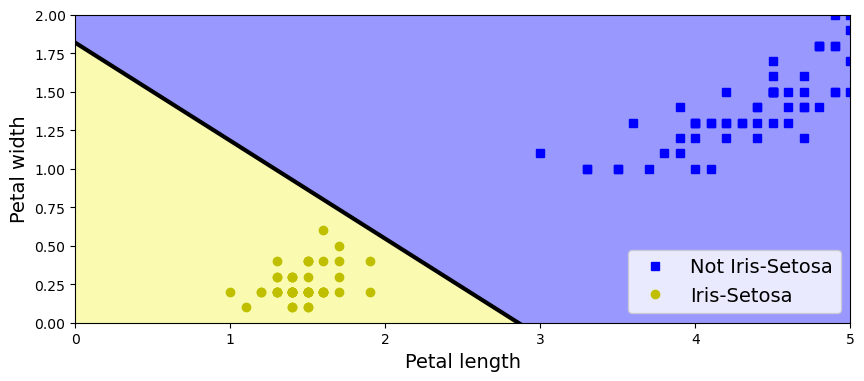

In [3]:
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

### * Construindo um classificador de imagem usando a sequential API 

 primeiro, temos que carregar um conjunto de dados, vamos usar o Fashion MNIST, um substituto direto do MNISTT. Ele tem exatamente o mesmo formato do MNIST (70 mil imagens em escala de cinza de 28 x 28 pixels cada, com 10 classes), porém as imagens representam artigos da moda em vez de algarismo manustricos.Desse modo , cada classe é mais diversificada e o probelma cada sendo substancialmente mais desafiador.

In [4]:
!pip install tensorflow

In [5]:
# instalando a TensorFlow2
import tensorflow as tf
from tensorflow import keras

In [6]:
# usando a keras para carregar o conjunto de dados 

#Vamos começar carregando o conjunto de dados MNIST de moda. Keras tem várias funções para carregar conjuntos de dados populares em keras.datasets. 
# O conjunto de dados já está dividido para você entre um conjunto de treinamento e um conjunto de teste, mas pode ser útil dividir ainda mais 
#o conjunto de treinamento para ter um conjunto de validação:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
# O conjunto de treinamento contém 60.000 imagens em tons de cinza, cada uma com 28x28 pixels:
X_train_full.shape

(60000, 28, 28)

In [8]:
# Cada intensidade de pixel é representada como um byte (0 a 255): 0,0
X_train_full.dtype

dtype('uint8')

In [9]:
# Vamos dividir o conjunto de treinamento completo em um conjunto de validação e um conjunto de treinamento (menor). 
# Também reduzimos as intensidades de pixel para o intervalo 0-1 e as convertemos em flutuantes, dividindo por 255.

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

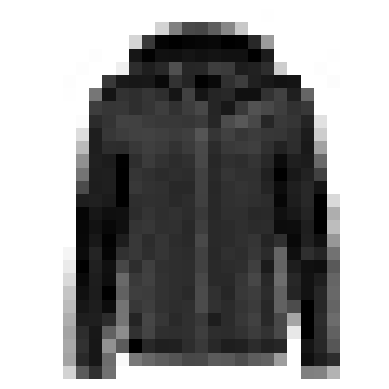

In [10]:
# plotar uma imagem usando a função imshow() do Matplotlib, com um mapa de cores 'binário':
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
# lista de nomes de classe para saber o que são as imagens: 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
# a primeira imagem no conjunto de treinamento representa um casaco ["coat"]:
class_names[y_train[0]]

'Coat'

In [14]:
# O conjunto de validação contém 5.000 imagens e o conjunto de teste contém 10.000 imagens:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

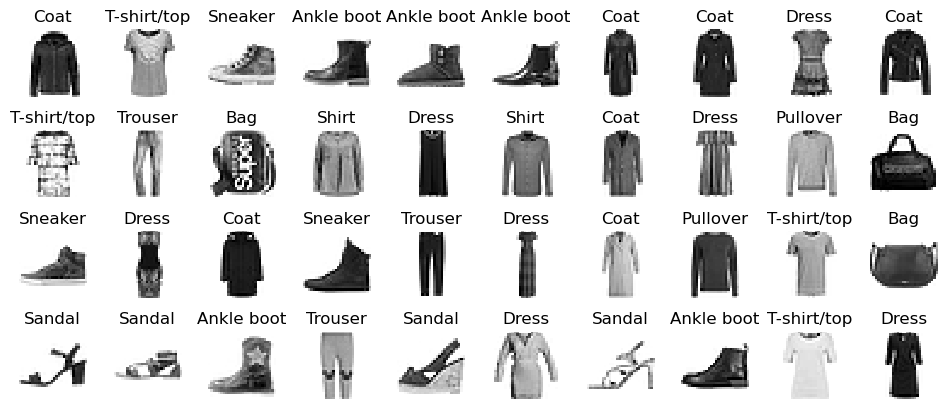

In [16]:
# Verificando uma amostra das imagens no conjunto de dados:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))